This is a simple example on how you can use a jupyter notebook to train your model :) 

In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots
import utils

In [2]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        # TODO: Implement this function (Task  2a)
        kernel_size_conv = 5
        stride_conv = 1
        padding = 2

        # Parameters for pooling
        kernel_size_pool = 2
        stride_pool = 2

        # Set number of filters for the different convolution layers
        num_filters_1 = 32
        num_filters_2 = 64
        num_filters_3 = 128

        # Set in features and out features for fully connected layers
        in_feature_1 = num_filters_3 * 4 * 4
        out_feature_1 = 64

        in_feature_2 = out_feature_1
        out_feature_2 = 10

        self.num_classes = num_classes
        # Define the convolutional and fully connected layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters_1,
                kernel_size=kernel_size_conv,
                stride=stride_conv,
                padding=padding
            ),
            nn.ReLU(), # [64, 3, 32, 32]
            nn.MaxPool2d(
                kernel_size=kernel_size_pool,
                stride=stride_pool
            ), # [64, 32, 16, 16]
            nn.ReLU(),
            nn.Conv2d(
                in_channels= num_filters_1,
                out_channels=num_filters_2,
                kernel_size=kernel_size_conv,
                stride=stride_conv,
                padding=padding
            ), # [64, 64, 16, 16]
            nn.MaxPool2d(
                kernel_size=kernel_size_pool,
                stride=stride_pool
            ), #[64, 64, 8, 8]
            nn.ReLU(),
            nn.Conv2d(
                in_channels=num_filters_2,
                out_channels=num_filters_3,
                kernel_size=kernel_size_conv,
                stride=stride_conv,
                padding=padding
            ), #[64, 128, 8, 8]
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=kernel_size_pool,
                stride=stride_pool
            ), # [64, 128, 4, 4]
            nn.Flatten(start_dim=1, end_dim=3), # Flatten in last three dimensions, [64, 2048]
            nn.Linear(in_features=in_feature_1, out_features=out_feature_1), # [64, 64]
            nn.ReLU(),
            nn.Linear(in_features=in_feature_2, out_features=out_feature_2) # [64, 10]
        )

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        # TODO: Implement this function (Task  2a)
        batch_size = x.shape[0]
        out = self.feature_extractor(x)
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [3]:
utils.set_seed(0)
epochs = 10
batch_size = 64
learning_rate = 5e-2
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=3)
    (11): Linear(in_features=2048, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=10, bias=True)
  )
)


RuntimeError: The size of tensor a (10) must match the size of tensor b (64) at non-singleton dimension 1

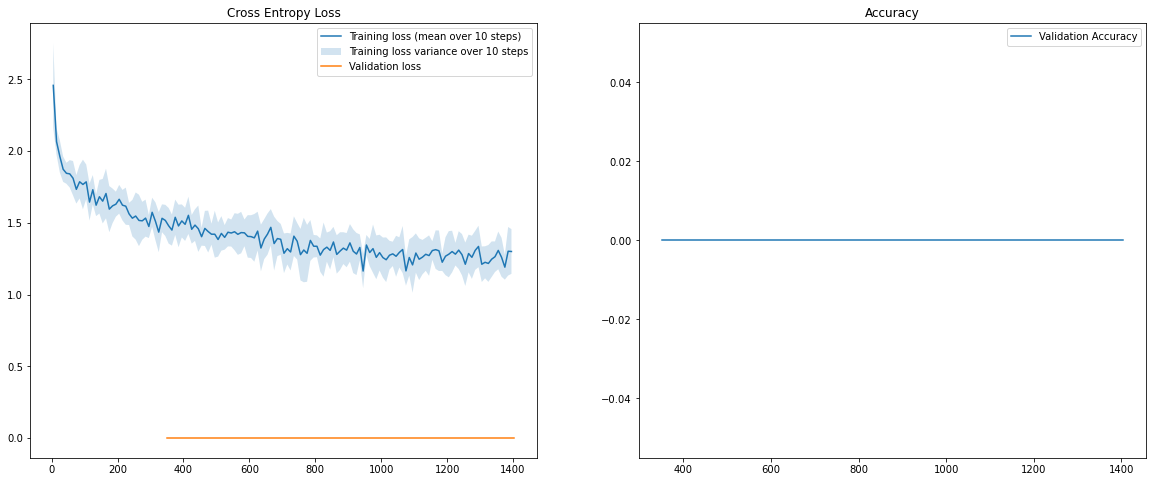

In [ ]:
create_plots(trainer, "task2")